In [1]:
import pandas as pd
file_path = "quora_dataset_filtered_sid.csv"
data_set = pd.read_csv(file_path)
data_set.head()
data_set.shape


(47456, 2)

In [2]:
data_set = data_set.dropna(subset=['Cleaned_Questions'])
data_set.shape

(47454, 2)

In [40]:
#Vectorizing

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=5, max_features=6000, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data_set['Cleaned_Questions'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df.head()

aa  aadhaar  aadhar  aap  aaron   ab  abandoned  abc  ability  able  ...  \
0  0.0      0.0     0.0  0.0    0.0  0.0        0.0  0.0      0.0   0.0  ...   
1  0.0      0.0     0.0  0.0    0.0  0.0        0.0  0.0      0.0   0.0  ...   
2  0.0      0.0     0.0  0.0    0.0  0.0        0.0  0.0      0.0   0.0  ...   
3  0.0      0.0     0.0  0.0    0.0  0.0        0.0  0.0      0.0   0.0  ...   
4  0.0      0.0     0.0  0.0    0.0  0.0        0.0  0.0      0.0   0.0  ...   

   youtube  youve   yr  zealand  zenfone  zero  zeus  zombie  zone  zuckerberg  
0      0.0    0.0  0.0      0.0      0.0   0.0   0.0     0.0   0.0         0.0  
1      0.0    0.0  0.0      0.0      0.0   0.0   0.0     0.0   0.0         0.0  
2      0.0    0.0  0.0      0.0      0.0   0.0   0.0     0.0   0.0         0.0  
3      0.0    0.0  0.0      0.0      0.0   0.0   0.0     0.0   0.0         0.0  
4      0.0    0.0  0.0      0.0      0.0   0.0   0.0     0.0   0.0         0.0  

[5 rows x 6000 columns]

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(max_df = 0.95, min_df = 5, max_features=6000, stop_words='english')
count_matrix = count_vectorizer.fit_transform(data_set['Cleaned_Questions'])
count_df = pd.DataFrame(count_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())
count_df.head()

aa  aadhaar  aadhar  aap  aaron  ab  abandoned  abc  ability  able  ...  \
0   0        0       0    0      0   0          0    0        0     0  ...   
1   0        0       0    0      0   0          0    0        0     0  ...   
2   0        0       0    0      0   0          0    0        0     0  ...   
3   0        0       0    0      0   0          0    0        0     0  ...   
4   0        0       0    0      0   0          0    0        0     0  ...   

   youtube  youve  yr  zealand  zenfone  zero  zeus  zombie  zone  zuckerberg  
0        0      0   0        0        0     0     0       0     0           0  
1        0      0   0        0        0     0     0       0     0           0  
2        0      0   0        0        0     0     0       0     0           0  
3        0      0   0        0        0     0     0       0     0           0  
4        0      0   0        0        0     0     0       0     0           0  

[5 rows x 6000 columns]

In [9]:
# Exploration

In [7]:
from textblob import TextBlob
data_set['polarity'] = data_set['Cleaned_Questions'].apply(lambda x: TextBlob(x).sentiment.polarity)
data_set


Cleaned_Questions  text_length_cleaned  \
0      astrology capricorn sun cap moon cap risingwha...                    8   
1      law change status student visa green card u co...                   12   
2                      mean every time look clock number                    6   
3             special care someone nose get stuffy night                    7   
4      united state government still blacklist employ...                   12   
...                                                  ...                  ...   
47451  laptop cpu cpu monitori want copy data cpu lap...                   11   
47452  internship available student ceramic technolog...                   10   
47453  safe store external battery power bank usb dev...                    9   
47454  think removal magsafe connector apple macbook pro                    7   
47455  approx annual cost living studying uic chicago...                    9   

       polarity  
0      0.000000  
1     -0.200000  
2     -0.312500  
3      0.357143  
4      0.000000  
...         ...  
47451  0.000000  
47452  0.200000  
47453  0.250000  
47454  0.000000  
47455  0.000000  

[47454 rows x 3 columns]

In [8]:
from plotly.offline import iplot
import cufflinks as cf
import matplotlib.pyplot as plt
cf.go_offline()  # Enable offline mode for cufflinks
import plotly.io as pio  # Import for saving plotly figures
cf.set_config_file(offline=True, world_readable=True)
fig = data_set['polarity'].iplot(
    kind='hist',
    bins=50,
    xTitle='Polarity',
    yTitle='Count',
    title='Distribution of Sentiment Polarity',
    asFigure = True
)
output_path = 'EDA_Results/Distribution_of_sentiment_polarity.png'
pio.write_image(fig, output_path)
fig.update_layout(
    width=800,  # Set the width in pixels
    height=500  # Set the height in pixels
)
fig.show()


c:\Users\siddharth\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning:

Blowfish has been deprecated



Observations:
1) Most of th data lies between being neutral and positive questions.
2) Very less data have negative questions.
3) There are highest number of neutral questions among all.

In [25]:
fig2 = data_set['text_length_cleaned'].iplot(
    kind='hist',
    bins=50,
    xTitle='Questions Length',
    yTitle='Count',
    title='Distribution of Questions Lengths',
    asFigure = True

)
output_path = 'EDA_Results/Distribution_of_Questions_length.png'
pio.write_image(fig2, output_path)
fig2.update_layout(
    width=800,  # Set the width in pixels
    height=500  # Set the height in pixels
)
fig2.show()

Observations:
1) There are 13.868k question have 8-9 words and followed by 12.008k questions have 10-11 words.
2) There are less number of questions with having 30 words in it.

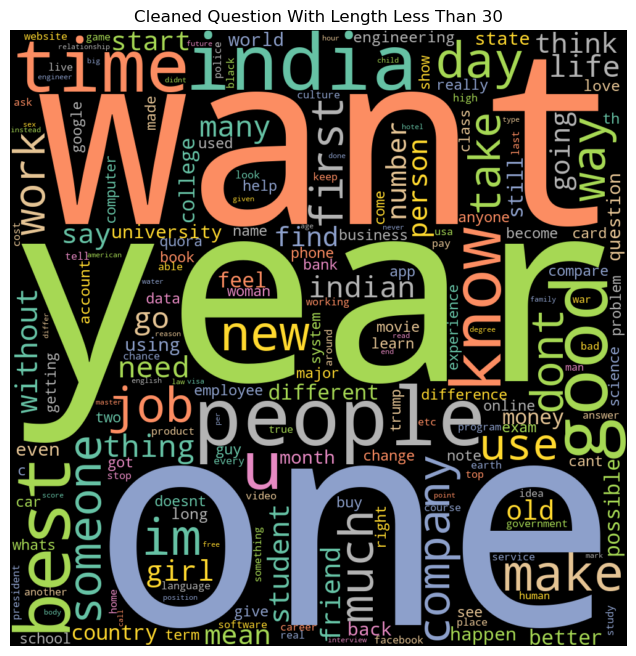

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 8))
text  = ' '.join(data_set.loc[data_set['text_length_cleaned']<= 30, "Cleaned_Questions"].values)
wc = WordCloud(width=1000, height=1000, background_color = "black", colormap = "Set2", collocations=False).generate(text)
plt.title("Cleaned Question With Length Less Than 30")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off");
plt.savefig('EDA_Results/Cleaned_Question_With_Length_Less_Than_30')

In [14]:
# Import necessary libraries
import gensim
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
import matplotlib.pyplot as plt

# Print the import confirmation
print("Libraries imported successfully.")

# Convert data to a format compatible with Gensim
texts = [doc.split() for doc in data_set['Cleaned_Questions']]
print(f"First 5 tokenized documents:\n{texts[:5]}")

# Create a dictionary representation of the documents
dictionary = Dictionary(texts)
print(f"Number of unique tokens: {len(dictionary)}")

# Convert the documents into a bag-of-words format
corpus = [dictionary.doc2bow(text) for text in texts]
print(f"First 5 documents in bag-of-words format:\n{corpus[:5]}")


Libraries imported successfully.
First 5 tokenized documents:
[['astrology', 'capricorn', 'sun', 'cap', 'moon', 'cap', 'risingwhat', 'say'], ['law', 'change', 'status', 'student', 'visa', 'green', 'card', 'u', 'compare', 'immigration', 'law', 'canada'], ['mean', 'every', 'time', 'look', 'clock', 'number'], ['special', 'care', 'someone', 'nose', 'get', 'stuffy', 'night'], ['united', 'state', 'government', 'still', 'blacklist', 'employment', 'etc', 'united', 'state', 'citizen', 'political', 'view']]
Number of unique tokens: 34741
First 5 documents in bag-of-words format:
[[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)], [(7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 1), (16, 1), (17, 1)], [(18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1)], [(24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1)], [(31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 2), (38, 1), (39, 2), (40, 1)]]


In [17]:
# Initialize an empty list to store coherence scores
coherence_scores = []

# Train LDA models with a range of topics and calculate coherence scores
for num_topics in range(6, 13):  # Adjust the range as needed
    print(f"Training LDA model with {num_topics} topics...")
    lda_model = gensim.models.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=10)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model_lda.get_coherence()
    coherence_scores.append((num_topics, coherence_score))
    print(f"Coherence score for {num_topics} topics: {coherence_score}")

print("Coherence scores for all topic models calculated.")


Training LDA model with 6 topics...
Coherence score for 6 topics: 0.3405982046291948
Training LDA model with 7 topics...
Coherence score for 7 topics: 0.3271056465994945
Training LDA model with 8 topics...
Coherence score for 8 topics: 0.3535564080657646
Training LDA model with 9 topics...
Coherence score for 9 topics: 0.36159471072354454
Training LDA model with 10 topics...
Coherence score for 10 topics: 0.32049402559051193
Training LDA model with 11 topics...
Coherence score for 11 topics: 0.31805977035275834
Training LDA model with 12 topics...
Coherence score for 12 topics: 0.32696181614790076
Coherence scores for all topic models calculated.


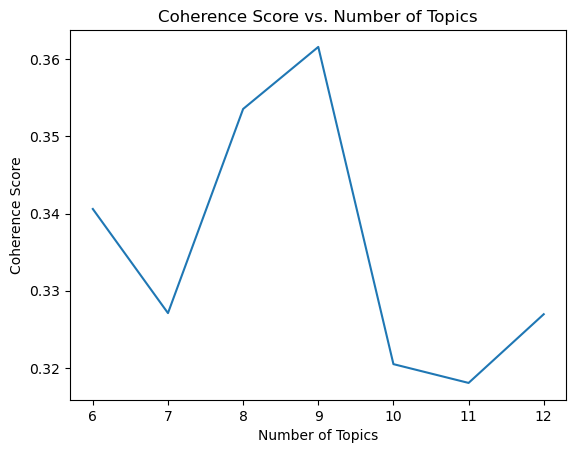

Coherence score plot displayed.


<Figure size 640x480 with 0 Axes>

In [27]:
# Plot coherence scores
x, y = zip(*coherence_scores)
plt.plot(x, y)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('Coherence Score vs. Number of Topics')
plt.show()
plt.savefig('EDA_Results/Coherence_score_vs_n_topics.png')
print("Coherence score plot displayed.")

Since n_topic = 9 have the highest coherence score, we are using n_ttopics = 9 in lda model.

In [29]:
from sklearn.decomposition import LatentDirichletAllocation
n_topics = 9
lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda_model.fit(tfidf_matrix )

LatentDirichletAllocation(n_components=9, random_state=42)

In [30]:
lda_model.components_

array([[ 0.11111761,  5.79236499,  3.58336809, ...,  0.11113586,
         0.11111972,  0.11113181],
       [ 0.11111112,  0.11111183,  0.11111525, ..., 10.37275419,
        11.69753923,  0.11111112],
       [ 0.67819129,  0.11111112,  0.11111178, ...,  0.11111769,
         0.11121221,  0.11112795],
       ...,
       [ 0.11113935,  0.11112619,  4.70116965, ...,  0.11111883,
         0.11112944,  0.11111112],
       [ 0.1111245 ,  0.11111112,  0.11111112, ...,  0.11112411,
         0.11111822,  0.11111112],
       [ 0.11112111,  0.11111112,  0.11113123, ...,  0.12680202,
         0.11111718,  0.11112031]])

In [33]:
feature_names = tfidf_vectorizer.get_feature_names_out()
topic_list = []
for topic_idx, topic in enumerate(lda_model.components_):
    top_words_idx = topic.argsort()[-10:][::-1]
    top_words = [feature_names[i] for i in top_words_idx]


    print(f" Top 10 words for topic #{topic_idx}")
    print(top_words)
    print('\n')

topic_result = lda_model.transform(count_matrix)
data_set['topic'] = topic_result.argmax(axis=1)

topic_result.shape


 Top 10 words for topic #0
['phone', 'app', 'use', 'website', 'buy', 'android', 'number', 'online', 'mobile', 'card']


 Top 10 words for topic #1
['india', 'country', 'war', 'world', 'english', 'people', 'state', 'china', 'language', 'indian']


 Top 10 words for topic #2
['major', 'learn', 'game', 'programming', 'term', 'learning', 'language', 'best', 'job', 'prospect']


 Top 10 words for topic #3
['question', 'quora', 'culture', 'answer', 'people', 'trump', 'facebook', 'like', 'account', 'email']


 Top 10 words for topic #4
['earth', 'light', 'india', 'people', 'human', 'planet', 'country', 'speed', 'world', 'try']


 Top 10 words for topic #5
['girl', 'like', 'love', 'im', 'feel', 'life', 'year', 'friend', 'guy', 'want']


 Top 10 words for topic #6
['note', 'money', 'india', 'car', 'government', 'bank', 'number', 'weight', 'rupee', 'best']


 Top 10 words for topic #7
['job', 'year', 'company', 'school', 'want', 'work', 'india', 'like', 'engineer', 'experience']


 Top 10 words 

(47454, 9)

In [34]:
import csv

def save_topics_to_csv(lda_model, tfidf_vectorizer, n_words, file_name):
    with open(file_name, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)

        # Write header
        writer.writerow(["Topic", "Top Words"])

        # Write each topic with its top words
        for idx, topic in enumerate(lda_model.components_):
            top_word_indices = topic.argsort()[-n_words:][::-1]
            top_words = [tfidf_vectorizer.get_feature_names_out()[i] for i in top_word_indices]
            writer.writerow([f"Topic {idx}", ", ".join(top_words)])

    print(f"Topics have been saved to {file_name}")

# Usage example
save_topics_to_csv(lda_model, tfidf_vectorizer, 10, "topics_tfidf_lda_sid_11052024.csv")


Topics have been saved to topics_tfidf_lda_sid_11052024.csv


In [35]:
import pickle

# Save the model to a file
def save_model(model, file_name):
    with open(file_name, 'wb') as f:
        pickle.dump(model, f)
    print(f"Model saved to {file_name}")


save_model(lda_model, 'lda_model_sid_11052024.pkl')

Model saved to lda_model_sid_11052024.pkl


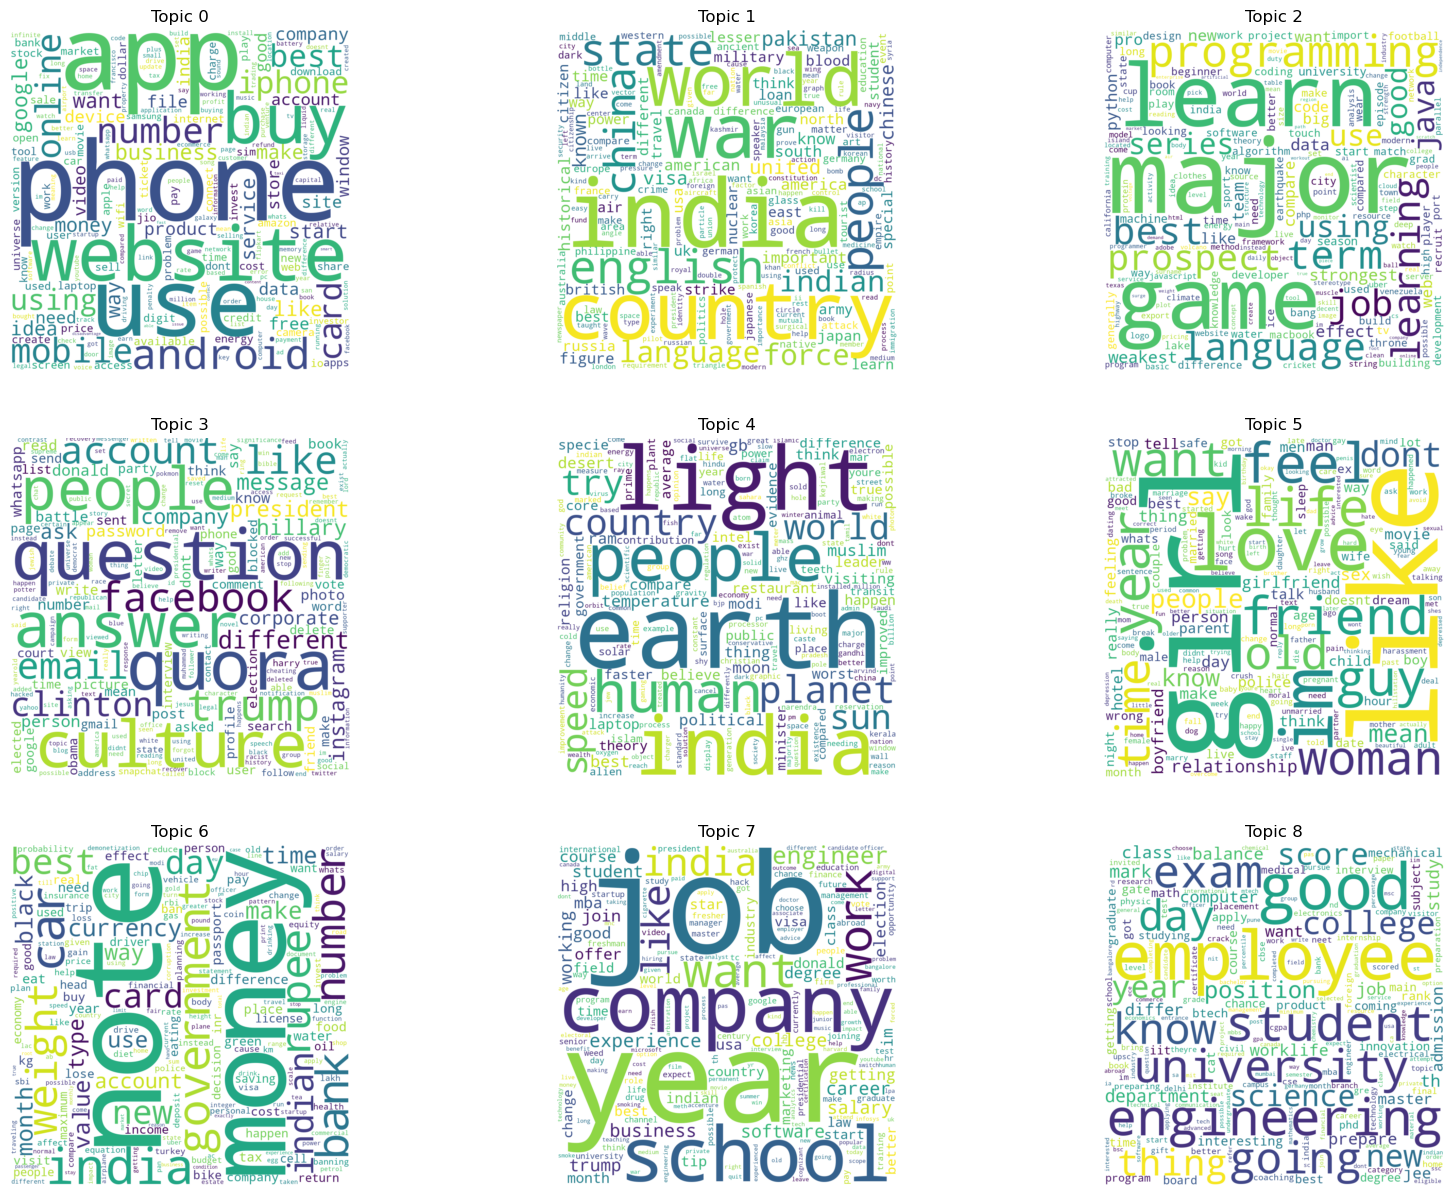

<Figure size 6000x2000 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import math

# Set the number of topics per row
topics_per_row = 3

# Total number of topics
num_topics = len(lda_model.components_)

# Calculate number of rows needed
num_rows = math.ceil(num_topics / topics_per_row)

# Create subplots
fig, axes = plt.subplots(num_rows, topics_per_row, figsize=(20, num_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each topic's word cloud
figure = plt.figure(figsize=(60, 20))
for topic_idx, (topic, ax) in enumerate(zip(lda_model.components_, axes)):
    wordcloud = WordCloud(width=1000, height=1000, background_color='white').generate_from_frequencies(
        dict(zip(tfidf_vectorizer.get_feature_names_out(), topic))
    )
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(f'Topic {topic_idx }')

# Turn off any unused subplots
for ax in axes[num_topics:]:
    ax.axis('off')

plt.tight_layout()
plt.show()
plt.savefig('EDA_Results/Prominent_words_per_each_topic')



In [44]:
labels = [
    "Technology",
    "Science",
    "Movies",
    "Music",
    "Health",
    "Books",
    "Education",
    "Food",
    "Business",
    "Visiting and Travel",
    "Psychology",
    "History",
    "Cooking",
    "Photography",
    "Design",
    "Sports",
    "Economics",
    "Writing",
    "Fashion and Style",
    "Philosophy",
    "Mathematics",
    "Finance",
    "Marketing",
    "Politics",
    "Entertainment",
    "Television Series",
    "Literature",
    "Computer Science",
    "Fine Art",
    "The Internet",
    "Mobile Phones",
    "Current Events in Technology",
    "Journalism",
    "Physics",
    "Healthy Eating",
    "Science of Everyday Life",
    "Startups",
    "Nutrition",
    "Entrepreneurship",
    "India",
    "Medicine and Healthcare",
    "Biology",
    "Money",
    "Silicon Valley",
    "Novels",
    "Small Businesses",
    "Writers and Authors",
    "Recipes",
    "Research",
    "Software Engineering"
]

In [47]:
# from transformers import pipeline
# classifier = pipeline("zero-shot-classification", model="roberta-large-mnli" )
# topic_to_label = {}
# for topic_idx, topic in enumerate(lda_model.components_):
#     top_words_idx = topic.argsort()[-20:][::-1]
#     top_words = [count_vectorizer.get_feature_names_out()[i] for i in top_words_idx]
#     print(f"Top 20 words for topic #{topic_idx}: {top_words}")

#     input_text = f"Words: {', '.join(top_words)}"
#     generated_label = classifier(input_text, candidate_labels=labels)
#     label = generated_label['labels'][0]
#     print(f"Topic {topic_idx} is about {label}")
#     topic_to_label[topic_idx] = label
#     print('\n')


import csv
from transformers import pipeline

# Initialize the zero-shot classification pipeline
classifier = pipeline("zero-shot-classification", model="roberta-large-mnli")
topic_to_label = {}

# Create and open a CSV file to write the output
output_file = 'Topic_Modelling_Results/topic_labels_sid_11052024.csv'
with open(output_file, 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    
    # Write the header row
    writer.writerow(["Topic Number", "Top Words", "Label"])

    # Iterate through topics and write each to the CSV
    for topic_idx, topic in enumerate(lda_model.components_):
        top_words_idx = topic.argsort()[-20:][::-1]
        top_words = [count_vectorizer.get_feature_names_out()[i] for i in top_words_idx]
        print(f"Top 20 words for topic #{topic_idx}: {top_words}")

        input_text = f"Words: {', '.join(top_words)}"
        generated_label = classifier(input_text, candidate_labels=labels)
        label = generated_label['labels'][0]
        print(f"Topic {topic_idx} is about {label}")
        topic_to_label[topic_idx] = label

        # Write the topic details to the CSV
        writer.writerow([f"Topic {topic_idx}", ", ".join(top_words), label])
        print('\n')

print(f"Topic labels have been saved to {output_file}")




Some weights of the model checkpoint at roberta-large-mnli were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Top 20 words for topic #0: ['phone', 'app', 'use', 'website', 'buy', 'android', 'number', 'online', 'mobile', 'card', 'iphone', 'best', 'using', 'business', 'google', 'want', 'like', 'way', 'make', 'idea']
Topic 0 is about Technology


Top 20 words for topic #1: ['india', 'country', 'war', 'world', 'english', 'people', 'state', 'china', 'language', 'indian', 'force', 'pakistan', 'united', 'visa', 'known', 'chinese', 'important', 'know', 'america', 'historical']
Topic 1 is about India


Top 20 words for topic #2: ['major', 'learn', 'game', 'programming', 'term', 'learning', 'language', 'best', 'job', 'prospect', 'using', 'java', 'use', 'series', 'good', 'strongest', 'weakest', 'data', 'effect', 'team']
Topic 2 is about Technology


Top 20 words for topic #3: ['question', 'quora', 'culture', 'answer', 'people', 'trump', 'facebook', 'like', 'account', 'email', 'clinton', 'different', 'president', 'message', 'hillary', 'company', 'ask', 'instagram', 'corporate', 'password']
Topic 3 is abou

In [48]:
topic_to_label

{0: 'Technology',
 1: 'India',
 2: 'Technology',
 3: 'The Internet',
 4: 'India',
 5: 'Literature',
 6: 'India',
 7: 'India',
 8: 'Science'}

In [49]:
topic_result = lda_model.transform(count_matrix)
topic_result[0]


array([0.01389012, 0.01389178, 0.01388925, 0.0138919 , 0.27238667,
       0.22841446, 0.0138906 , 0.41585625, 0.01388897])

In [51]:
Question = data_set['Cleaned_Questions'][0]
Question

'astrology capricorn sun cap moon cap risingwhat say'

In [52]:
topic_to_label[topic_result[0].argmax()]

'India'

In [53]:
data_set['topic_id'] = topic_result.argmax(axis=1)
data_set['topic_label'] = data_set['topic'].apply(lambda x: topic_to_label[x])
data_set.head()

Cleaned_Questions  text_length_cleaned  \
0  astrology capricorn sun cap moon cap risingwha...                    8   
1  law change status student visa green card u co...                   12   
2                  mean every time look clock number                    6   
3         special care someone nose get stuffy night                    7   
4  united state government still blacklist employ...                   12   

   polarity  topic  topic_id topic_label  
0  0.000000      7         7       India  
1 -0.200000      1         1       India  
2 -0.312500      6         6       India  
3  0.357143      5         5  Literature  
4  0.000000      1         1       India